# Check with Gao Data
verify the rmg calculated thermo by extrapolating the H to 0K against the data from Gao (2016)

In [1]:
import sys
import os
import re
import numpy
import sys
sys.path.append('/work/westgroup/ChrisB/_04_thesis/rmg_thesis/RMG-Py/')
print(sys.path)
from rmgpy.species import Species

['/work/westgroup/ChrisB/_04_thesis/Thesis_repo/validation_data', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python37.zip', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/lib-dynload', '', '/home/blais.ch/.local/lib/python3.7/site-packages', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/site-packages', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/site-packages/chemprop-0.0.1-py3.7.egg', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/site-packages/descriptastorus-2.0.0.32-py3.7.egg', '/work/westgroup/ChrisB/miniconda3/envs/rmg_thesis/lib/python3.7/site-packages/IPython/extensions', '/home/blais.ch/.ipython', '/work/westgroup/ChrisB/_04_thesis/rmg_thesis/RMG-Py/']


In [29]:
# load the thermodynamics database
from rmgpy.data.thermo import ThermoDatabase
thermoDatabase = ThermoDatabase()
libraries = ['surfaceThermoPt111']
if sys.platform == "darwin":
    thermoDatabase.load(path="/Users/blais.ch/Documents/_01_code/RMG_env_1/RMG-database/input/thermo", libraries = libraries)
else: 
    thermoDatabase.load(path='/work/westgroup/ChrisB/_04_thesis/rmg_thesis/RMG-database/input/thermo', libraries = libraries)
    
thermoDatabase.load_surface()

In [37]:
class SpeciesDat():
    def __init__(self, adj_list): 
        self.rmg_spec = Species().from_adjacency_list(adj_list)
        self.rmg_spec.thermo = thermoDatabase.get_thermo_data_from_libraries(self.rmg_spec)[0]
        self.rmg_spec.generate_resonance_structures()
        self.spec_thermo = self.rmg_spec.thermo.to_thermo_data()
        self.rmg_spec.thermo = self.spec_thermo
        self.E_ad_old = (self.rmg_spec.thermo.H298.value_si)/9.68e4

    def scale_rmg_thermo(metal_from='Pt', metal_to='Rh', 
                         facet_from='111', facet_to='211'):
        
        self.new_thermo = thermoDatabase.correct_binding_energies_extended(self.spec_thermo, 
                                                                           self.rmg_spec, 
                                                                           metal_to_scale_from=metal_from,
                                                                           metal_to_scale_to=metal_to, 
                                                                           facet_to_scale_from=facet_from, 
                                                                           facet_to_scale_to=facet_to)
        

        

'C'

'CH'

'CH2'

'CH3'

'CO'

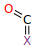

'COOH'

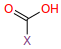

'CHO'

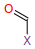

'COH'

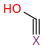

'CHOH'

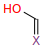

'N'

'NH'

'NNH2'

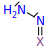

'NH2'

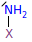

'O'

'OH'

'OOH'

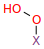

'OCH3'

In [38]:
gao_species = {}

# C
spec = 'C'
adj = """
1 C u0 p0 c0 {2,Q}
2 X u0 p0 c0 {1,Q}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# CH
spec = 'CH'
adj = """
1 C u0 p0 c0 {2,S} {3,T}
2 H u0 p0 c0 {1,S}
3 X u0 p0 c0 {1,T}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec, gao_species[spec].rmg_spec)

# CH2
spec = 'CH2'
adj = """
1 C u0 p0 c0 {2,S} {3,S} {4,D}
2 H u0 p0 c0 {1,S}
3 H u0 p0 c0 {1,S}
4 X u0 p0 c0 {1,D}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# CH3
spec = 'CH3'
adj = """
1 C u0 p0 c0 {2,S} {3,S} {4,S} {5,S}
2 H u0 p0 c0 {1,S}
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 X u0 p0 c0 {1,S}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# CO
spec = 'CO'
adj = """
1 C u0 p0 c0 {2,D} {3,D} 
2 O u0 p2 c0 {1,D}
3 X u0 p0 c0 {1,D}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# COOH
spec = 'COOH'
adj = """
1 C u0 p0 c0 {2,D} {3,S} {5,S}
2 O u0 p2 c0 {1,D}
3 O u0 p2 c0 {1,S} {4,S}
4 H u0 p0 c0 {3,S}
5 X u0 p0 c0 {1,S}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# CHO
spec = 'CHO'
adj = """
1 C u0 p0 c0 {2,D} {3,S} {4,S}
2 O u0 p2 c0 {1,D}
3 H u0 p0 c0 {1,S}
4 X u0 p0 c0 {1,S}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# COH
spec = 'COH'
adj = """
1 C u0 p0 c0 {2,S} {4,T}
2 O u0 p2 c0 {1,S} {3,S}
3 H u0 p0 c0 {2,S}
4 X u0 p0 c0 {1,T}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# CHOH
spec = 'CHOH'
adj = """
1 C u0 p0 c0 {2,S} {4,S} {5,D}
2 O u0 p2 c0 {1,S} {3,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {1,S}
5 X u0 p0 c0 {1,D}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# N
spec = 'N'
adj = """
1 N u0 p1 c0 {2,T} 
2 X u0 p0 c0 {1,T}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# NH
spec = 'NH'
adj = """
1 N u0 p1 c0 {2,S} {3,D} 
2 H u0 p0 c0 {1,S}
3 X u0 p0 c0 {1,D}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# NNH2 
spec = 'NNH2'
adj = """
1 N u0 p1 c0 {2,S} {3,S} {4,S}
2 N u0 p1 c0 {1,S} {5,D} 
3 H u0 p0 c0 {1,S}
4 H u0 p0 c0 {1,S}
5 X u0 p0 c0 {2,D}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# NH2
spec = 'NH2'
adj = """
1 N u0 p1 c0 {2,S} {3,S} {4,S} 
2 H u0 p0 c0 {1,S}
3 H u0 p0 c0 {1,S}
4 X u0 p0 c0 {1,S}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# O
spec = 'O'
adj = """
1 O u0 p2 c0 {2,D}
2 X u0 p0 c0 {1,D}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# OH
spec = 'OH'
adj = """
1 O u0 p2 c0 {2,S} {3,S}
2 H u0 p0 c0 {1,S}
3 X u0 p0 c0 {1,S}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# OOH
spec = 'OOH'
adj = """
1 O u0 p2 c0 {2,S} {4,S}
2 O u0 p2 c0 {1,S} {3,S}
3 H u0 p0 c0 {2,S}
4 X u0 p0 c0 {1,S}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

# OCH3
spec = 'OCH3'
adj = """
1 O u0 p2 c0 {2,S} {6,S}
2 C u0 p0 c0 {1,S} {3,S} {4,S} {5,S}
3 H u0 p0 c0 {2,S}
4 H u0 p0 c0 {2,S}
5 H u0 p0 c0 {2,S}
6 X u0 p0 c0 {1,S}
"""
gao_species[spec] = SpeciesDat(adj)
display(spec,gao_species[spec].rmg_spec)

In [56]:
Hf0 = gao_species['C'].rmg_spec.thermo.get_enthalpy(0)/9.68e4
Hf_gas = 

0.5825201292201294

In [70]:
gao_species['C'].rmg_spec.thermo.to_nasa(298,1000,2000)

NASA(polynomials=[NASAPolynomial(coeffs=[-0.937461,0.0121079,-1.32659e-05,4.83221e-09,-3.49439e-13,6901.39,3.00315], Tmin=(298,'K'), Tmax=(463.725,'K')), NASAPolynomial(coeffs=[-1.63633,0.0170451,-2.57069e-05,1.7644e-08,-4.52104e-12,6977.94,5.96423], Tmin=(463.725,'K'), Tmax=(1000,'K'))], Tmin=(298,'K'), Tmax=(1000,'K'), E0=(56.8687,'kJ/mol'), Cp0=(0.01,'J/(mol*K)'), CpInf=(49.8868,'J/(mol*K)'), comment="""Thermo library: surfaceThermoPt111""")

In [68]:
dir(gao_species['C'].rmg_spec.thermo)
gao_species['C'].rmg_spec.thermo._Cp0, gao_species['C'].rmg_spec.thermo._CpInf, 

((0.01,'J/(mol*K)'), (49.8868,'J/(mol*K)'))

In [69]:
dir(gao_species['O'].rmg_spec.thermo)
gao_species['O'].rmg_spec.thermo._Cp0, gao_species['O'].rmg_spec.thermo._CpInf, 

((0.01,'J/(mol*K)'), (49.8868,'J/(mol*K)'))

In [74]:
gao_species['CHOH'].rmg_spec.molecule[0].atoms

[<Atom 'O'>, <Atom 'C'>, <Atom 'H'>, <Atom 'H'>, <Atom 'X'>]